In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


## Problem 1.
 
An article reported data from a study in which both a baseline gasoline mixture and a reformulated gasoline were used. Consider the following observations on age (yr) and NOx emissions (g/kWh):

In [2]:
Engine <- c(1,2,3,4,5,6,7,8,9,10)
Age <- c(0,0,2,11,7,16,9,0,12,4)
Baseline <- c(1.74,4.37,4.07,1.25,5.32,0.60,3.38,3.45,0.72,1.25)
Reformulated <- c(1.87,5.94,5.52,2.70,6.52,0.72,4.95,4.92,0.69,1.41)

Construct scatter plots of the baseline NOx emissions versus age.

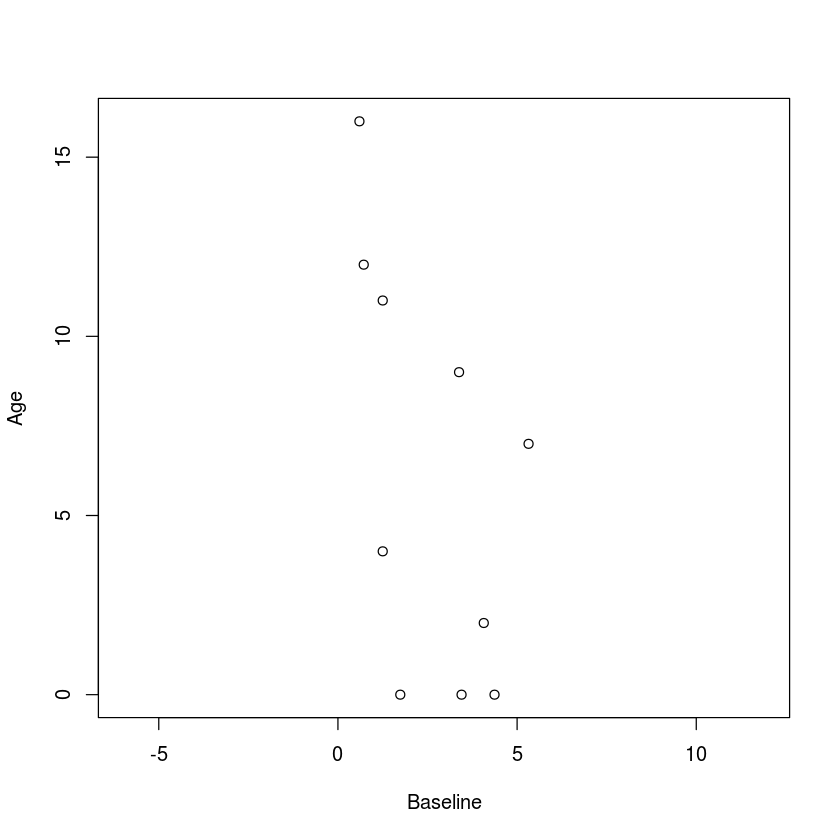

In [72]:
plot(Baseline,Age,asp=1)

Construct scatter plots of the reformulated NOx emissions versus age.

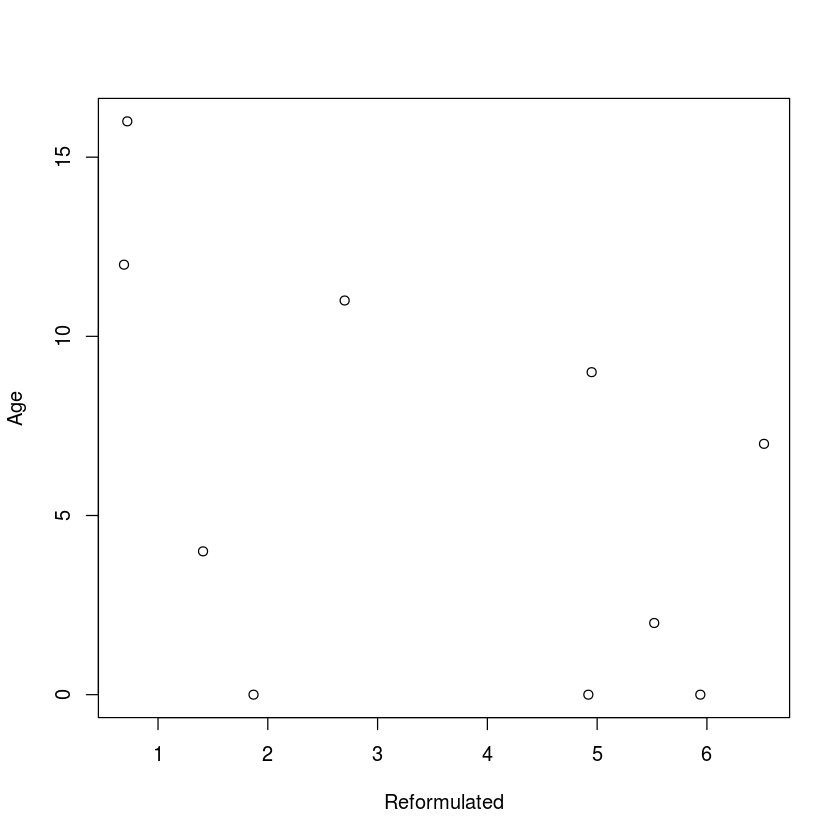

In [4]:
plot(Reformulated,Age)

What appears to be the nature of the relationship between these two variables?

There is no compelling relationship between the data.

## Problem 2.
Bivariate data often arises from the use of two different techniques to measure the same quantity. As an example, the accompanying observations on x = hydrogen concentration (ppm) using a gas chromatography method and y = concentration using a new sensor method were read from a graph in an article.

In [5]:
x <- c(48,62,66,70,70,78,95,100,114,118,124,127,140,140,140,150,152,164,198,221)
y <- c(39,62,53,66,84,79,93,106,117,116,127,114,134,139,142,170,149,154,200,215)

Construct a scatterplot.

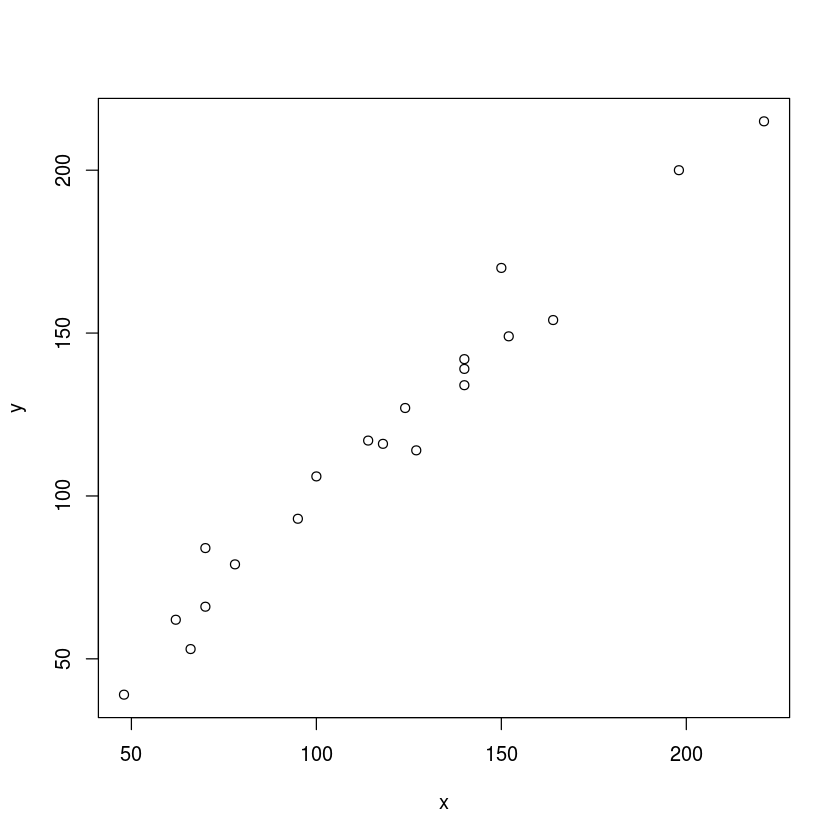

In [6]:
plot(x,y)

Does there appear to be a very strong relationship between the two types of concentration measurements? 

Do the two methods appear to be measuring roughly the same quantity? Explain your reasoning.

The points fall very close to a straight line with an x-intercept of approximately 0 and a slope of about 1. This suggests that the two methods are producing substantially the same concentration measurements. 

## Problem 3.
An article on estimating 28-day strength of concrete considered regressing y = 28-day standard-cured strength (psi) against x = accelerated strength (psi). Suppose the equation of the true regression line is y = 1830 + 1.2x.

In [7]:
coefficients <- c(1830,1.2)

(a) What is the expected value of 28-day strength when accelerated strength = 2540?

In [8]:
coefficients %*% c(1,2540)

4878


(b) By how much can we expect 28-day strength to change when accelerated strength increases by 1 psi?

In [9]:
coefficients %*% c(0,1)

1.2


(c) By how much can we expect 28-day strength to change when accelerated strength increases by 80 psi?

In [10]:
coefficients %*% c(0,80)

96


(d) By how much can we expect 28-day strength to change when accelerated strength decreases by 80 psi?

In [11]:
coefficients %*% c(0,-80)

-96


## Problem 4.
An article considered regressing y = 28-day standard-cured strength (psi)
against x = accelerated strength (psi). Suppose the equation of the true regression line is
y = 1800 + 1.4x and that the standard deviation of the random deviation ϵ is 350 psi.

In [12]:
coefficients  <- c(1800,1.4)
sigma <- 350

(a) What is the probability that the observed value of 28-day strength will exceed 5000 psi when the value of accelerated strength is 2100? (Round your answer to four decimal places.)

In [13]:
mu <- coefficients %*% c(1,2100)
mu
1-pnorm(5000,mu,sigma) %>% round(4) #P(Y>5000)=1-P(Y<5000); right tail of a normal dist centered at y(2100)=4740

4740


[1] 0.2288

(b) What is the probability that the observed value of 28-day strength will exceed 5000 psi when the value of accelerated strength is 2500? (Round your answer to four decimal places.)

In [14]:
mu <- coefficients %*% c(1,2500)
mu
1-pnorm(5000,mu,sigma) %>% round(4)

5300


[1] 0.8043

(c) Consider making two independent observations on 28-day strength, the first for an accelerated strength of 2100 and the second for x = 2500.
What is the probability that the second observation will exceed the first by more than 1000 psi? (Round your answer to four decimal places.)

In [15]:
sigma_diff <- sqrt(sigma^2+sigma^2) #sum of variance of independent events
Y1 <- coefficients %*% c(1,2100)
Y2 <- coefficients %*% c(1,2500)
1-pnorm(1000,Y2-Y1,sigma_diff) %>% round(4)

[1] 0.187

(d) Let Y1 and Y2 denote observations on 28-day strength when x = x1 and x = x2, respectively. 

By how much would x2 have to exceed x1 in order that P(Y2 > Y1) = 0.95? (Round your answer to two decimal places.)

In [16]:
# P(Y2-Y1 < c) = 0.95 
delta_Y <- qnorm(0.95,0,sigma_diff)
(delta_Y/coefficients[2]) %>% round(2)

[1] 581.54

## Problem 5.
The flow rate y (m3/min) in a device used for air-quality measurement depends on the pressure drop x (in. of water) across the device's filter. Suppose that for x values between 5 and 20, the two variables are related according to the simple linear regression model with true regression line y = −0.12 + 0.095x.

In [17]:
coefficients <- c(-0.12,0.095)

(a) What is the expected change in flow rate associated with a 1 in. increase in pressure drop? Explain.

We expect the change in flow rate (y) to be the slope of the regression line. 


(b) What change in flow rate can be expected when pressure drop decreases by 5 in.?

In [18]:
coefficients %*% c(0,5)

0.475


(c) What is the expected flow rate for a pressure drop of 10 in.? A drop of 15 in.? 10 in. drop 

In [19]:
coefficients %*% c(1,10)
coefficients %*% c(1,15)

0.83


1.305


(d) Suppose σ = 0.025 and consider a pressure drop of 10 in. What is the probability that the observed value of flow rate will exceed 0.835? That observed flow rate will exceed 0.840? (Round your answers to four decimal places.) 
P(Y > 0.835) = P(Y > 0.840)

In [20]:
sigma <- 0.025
mu <- coefficients %*% c(1,10)

(1-pnorm(0.835,mu,sigma)) %>% round(4)
(1-pnorm(0.840,mu,sigma)) %>% round(4)

[1] 0.4207

[1] 0.3446

(e) What is the probability that an observation on flow rate when pressure drop is 10 in. will exceed an observation on flow rate made when pressure drop is 11 in.? (Round your answer to four decimal places.)

In [21]:
sigma_diff <- sqrt(sigma^2+sigma^2)
mu_diff <- coefficients %*% c(0,11-10)
pnorm(0,mu_diff,sigma_diff) %>% round(4) #P(Y(11)-Y(10)<0)

[1] 0.0036

## Problem 6.
The accompanying data on x = current density (mA/cm2) and y = rate of deposition (µm/min) appeared in an article. Do you agree with the claim by the article's author that "a linear relationship was obtained from the tin-lead rate of deposition as a function of current density"?

In [22]:
x <- c(20,40,60,80)
y <- c(0.34,1.15,1.76,2.17)

[1] 0.979


Call:
lm(formula = y ~ x)

Residuals:
   1    2    3    4 
-0.1  0.1  0.1 -0.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.170000   0.173205  -0.981   0.4298  
x            0.030500   0.003162   9.645   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1414 on 2 degrees of freedom
Multiple R-squared:  0.979,	Adjusted R-squared:  0.9684 
F-statistic: 93.03 on 1 and 2 DF,  p-value: 0.01058


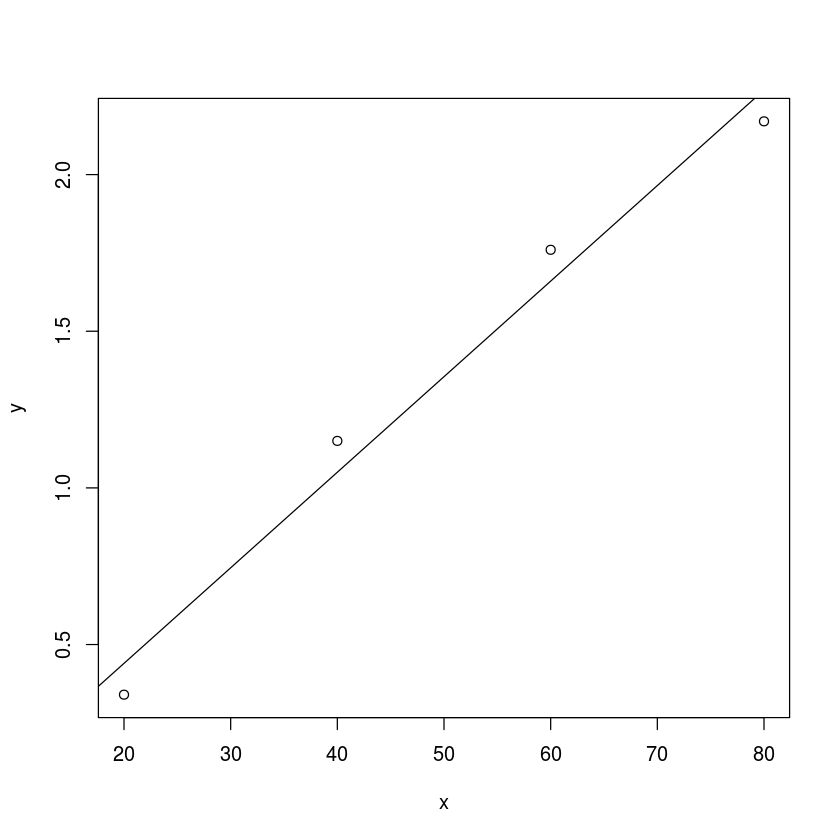

In [23]:
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
r_squared <- (syy-sse)/syy
r_squared %>% round(3)
#check answer
fit <- lm(y~x)
summary(fit)
plot(x,y)
abline(fit)

Find the value of r2. (Round your answer to three decimal places.) Explain your reasoning.

The very high value of r2 confirms the author's claim. 

## Problem 7.
The efficiency for a steel specimen immersed in a phosphating tank is the weight of the phosphate coating divided by the metal loss (both in mg/ft2). An article gave the accompanying data on tank temperature (x) and efficiency ratio (y).

In [24]:
Temp <- c(174,176,177,178,178,179,180,181,184,184,184,184,184,185,185,186,186,186,186,188,188,189,190,192)
Ratio <- c(0.88,1.27,1.42,0.99,1.17,1.08,0.96,1.84,1.41,1.58,1.69,2.15,2.25,0.82,1.41,0.80,1.81,2.00,2.68,1.51,2.60,3.00,1.91,3.02)


Call:
lm(formula = Ratio ~ Temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11208 -0.33008 -0.01209  0.40491  0.80593 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -15.572      4.221  -3.689 0.001284 ** 
Temp           0.094      0.023   4.088 0.000487 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5163 on 22 degrees of freedom
Multiple R-squared:  0.4316,	Adjusted R-squared:  0.4058 
F-statistic: 16.71 on 1 and 22 DF,  p-value: 0.0004872


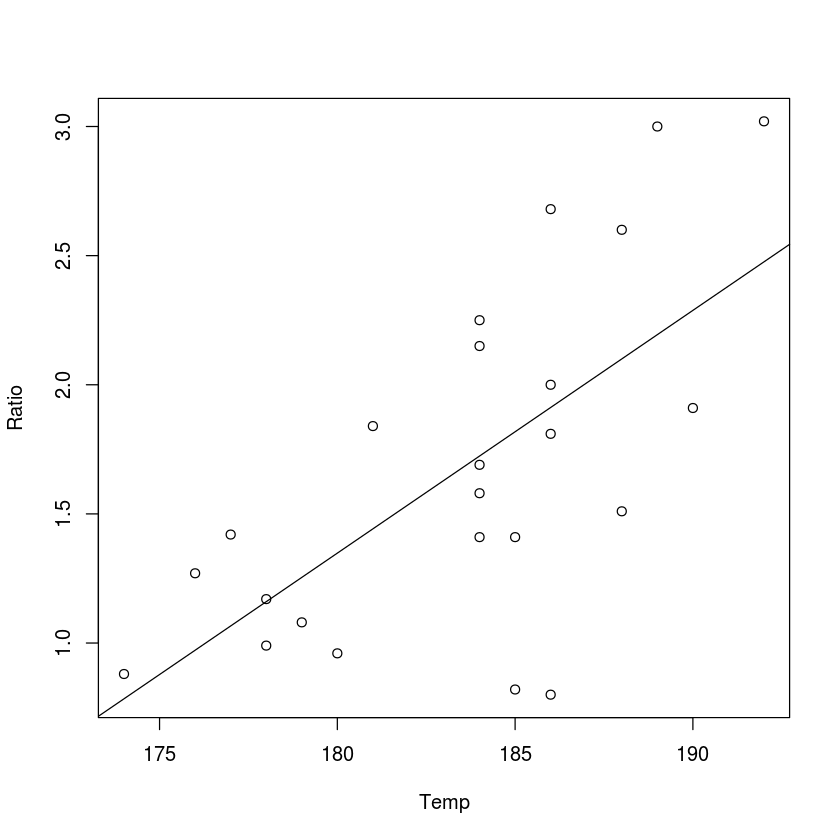

In [25]:
sxx   <- sum((Temp-mean(Temp))^2) 
syy   <- sum((Ratio-mean(Ratio))^2)
sxy   <- sum((Temp-mean(Temp))*(Ratio-mean(Ratio)))
B1    <- sxy/sxx
B0    <- mean(Ratio)-B1*mean(Temp)

#check
fit <- lm(Ratio~Temp)
summary_of_fit <- summary(fit)
summary_of_fit
plot(Temp,Ratio)
abline(fit)

(a) Determine the equation of the estimated regression line. (Round all numerical values to five decimal places.)

In [26]:
paste("y =",round(B0,5),'+',round(B1,5),"* x")

[1] "y = -15.57155 + 0.094 * x"

(b) Calculate a point estimate for true average efficiency ratio when tank temperature is 186. (Round your answer to four decimal places.)

In [27]:
predict_186 <- B0+B1*186
#predict_186 <- c(B0,B1) %*% c(1,186) #same as above, but using matrix multiplication
predict_186 %>% round(4)

[1] 1.9121

(c) Calculate the values of the residuals from the least squares line for the four observations for which temperature is 186. (Round your answers to four decimal places.)

(186, 0.80)
(186, 1.81)
(186, 2.00)
(186, 2.68)

In [28]:
(0.80-predict_186) %>% round(4)
(1.81-predict_186) %>% round(4)
(2.00-predict_186) %>% round(4)
(2.68-predict_186) %>% round(4)

[1] -1.1121

[1] -0.1021

[1] 0.0879

[1] 0.7679

Why do they not all have the same sign?


These residuals do not all have the same sign because in the cases of the first two pairs of observations, the observed efficiency ratios were smaller than the predicted value. In the cases of the last two pairs of observations, the observed efficiency ratios were larger than the predicted value. 

(d) What proportion of the observed variation in efficiency ratio can be attributed to the simple linear regression relationship between the two variables? (Round your answer to four decimal places.)

In [29]:
predict_y <- B0+B1*Temp
sse <- sum((Ratio-predict_y)^2)
r_squared <- (syy-sse)/syy
r_squared %>% round(4)

#check answer
summary_of_fit$r.squared %>% round(4)

[1] 0.4316

[1] 0.4316

## Problem 8.
An article gave a scatter plot along with the least squares line of x = rainfall volume (m3) and y = runoff volume (m3) for a particular location. The accompanying values were read from the plot.

In [30]:
x <- c(8,12,14,17,23,30,40,50,55,67,72,81,96,112,127)
y <- c(4,10,13,15,15,25,27,48,38,46,53,73,82,99,103)

(a) Does a scatter plot of the data support the use of the simple linear regression model?

Yes, the scatterplot shows a reasonable linear relationship. 

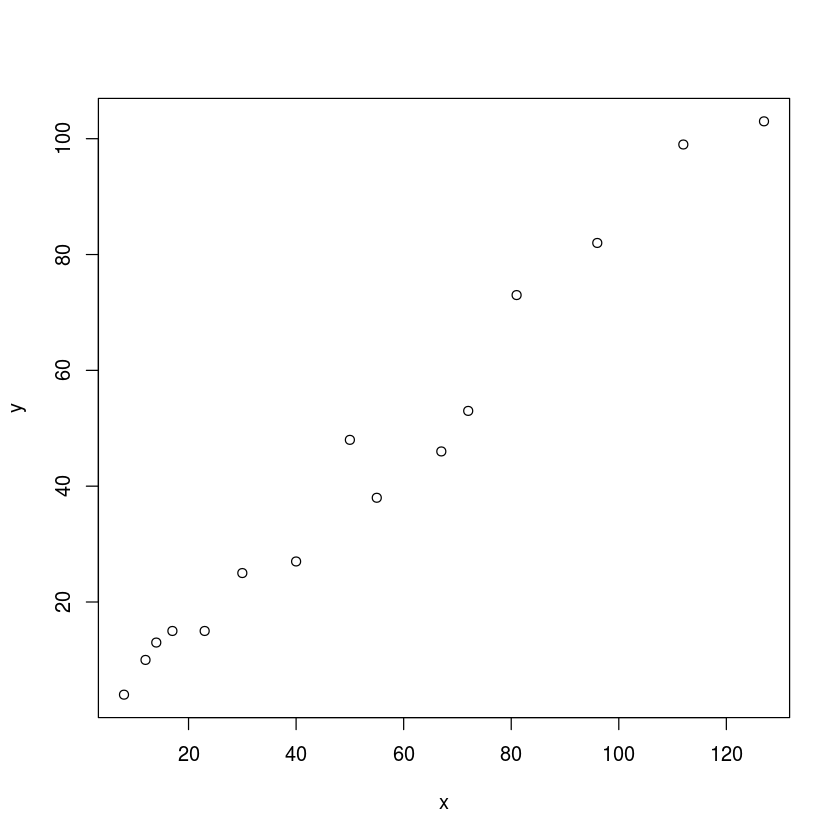

In [31]:
plot(x,y)

(b) Calculate point estimates of the slope and intercept of the population regression line. (Round your answers to five decimal places.)

In [32]:
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
B0 %>% round(5)
B1 %>% round(5)
#check answer
fit <- lm(y~x)
fit$coefficients %>% round(5)

[1] -2.10221

[1] 0.84892

(Intercept)           x 
   -2.10221     0.84892

(c) Calculate a point estimate of the true average runoff volume when rainfall volume is 47. (Round your answer to four decimal places.)

In [33]:
(B0+B1*47) %>% round(4)

[1] 37.7971

(d) Calculate a point estimate of the standard deviation σ. (Round your answer to two decimal places.)

In [34]:
n <- length(y)
s <- sqrt(sum(fit$residuals^2)/(n-2)) 
s %>% round(2)

#check answer
summary_of_fit <- summary(fit)
summary_of_fit$sigma %>% round(2)

[1] 5.26

[1] 5.26

(e) What proportion of the observed variation in runoff volume can be attributed to the simple linear regression relationship between runoff and rainfall? (Round your answer to four decimal places.)

In [35]:
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
r_squared <- (syy-sse)/syy
r_squared %>% round(4)

#check answer
summary_of_fit$r.squared %>% round(4)

[1] 0.976

[1] 0.976

## Problem 9.
The bond behavior of reinforcing bars is an important determinant of strength and stability. The article "Experimental Study on the Bond Behavior of Reinforcing Bars Embedded in Concrete Subjected to Lateral Pressure" reported the results of one experiment in which varying levels of lateral pressure were applied to 21 concrete cube specimens, each with an embedded 16 mm plain steel round bar, and the corresponding bond capacity was determined. Due to differing concrete cube strengths (fcu, in MPa), the applied lateral pressure was equivalent to a fixed proportion of the specimen's fcu (0, 0.1fcu,   , 0.6fcu). Also, since bond strength can be heavily influenced by the specimen's fcu, bond capacity was expressed as the ratio of bond strength (MPa) to fcu.

In [36]:
Pressure <-c(0,0,0,0.1,0.1,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6)
Ratio <- c(0.123,0.100,0.101,0.172,0.133,0.107,0.217,0.172,0.151,0.263,0.227,0.252,0.310,0.365,0.239,0.365,0.319,0.312,0.394,0.386,0.320)

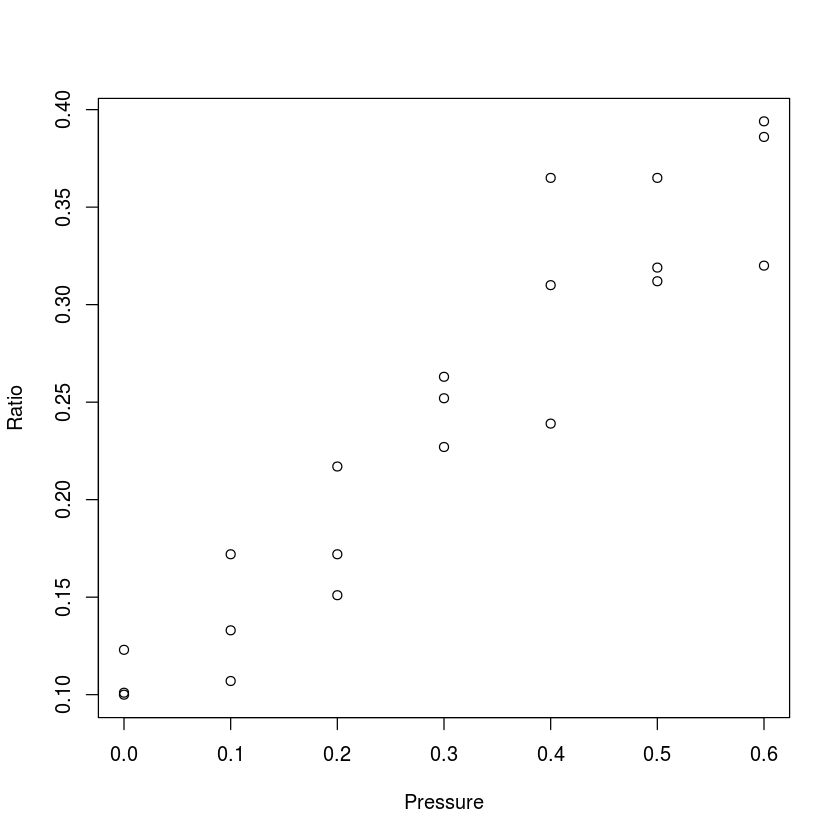

In [37]:
plot(Pressure,Ratio)

(a) Does a scatterplot of the data support the use of the simple linear regression model?

A scatterplot of the data shows a reasonably strong, positive, linear relationship between pressure and the bond capacity ratio and supports the use of a simple linear regression model.


(b) Use the accompanying Minitab output to give point estimates of the slope and intercept of the population regression line. (Enter your answers to five decimal places.)

The regression equation is 

Ratio = 0.101 + 0.461 Pressure

|Predictor|Coef   |SE Coef|T    |P    |
|---------|-------|-------|-----|-----|
|Constant |0.10121|0.01308|7.74 |0.000|
|Pressure |0.46071|0.03627|12.70|0.000|
|S = 0.0332397|R-Sq = 89.5%|R-Sq(adj) = 88.9%| | |

Analysis of Variance 

|Source        |DF|SS     |MS     |F     |P    |
|--------------|--|-------|-------|------|-----|
|Regression    |1 |0.17830|0.17830|161.37|0.000|
|Residual Error|19|0.02099|0.00110|	     |     |
|Total         |20|0.19929|		  |      |     |

In [38]:
sxx   <- sum((Pressure-mean(Pressure))^2) 
syy   <- sum((Ratio-mean(Ratio))^2)
sxy   <- sum((Pressure-mean(Pressure))*(Ratio-mean(Ratio)))
B1    <- sxy/sxx
B0    <- mean(Ratio)-B1*mean(Pressure)
B0 %>% round(5)
B1 %>% round(5)

#Check answer
fit <- lm(Ratio~Pressure)
fit$coefficients %>% round(5)

[1] 0.10121

[1] 0.46071

(Intercept)    Pressure 
    0.10121     0.46071

Calculate a point estimate of the true average bond capacity when lateral pressure is 0.44fcu. (Round your answer to four decimal places.)

In [39]:
(B0+B1*0.44) %>% round(4)

[1] 0.3039

(d) What is a point estimate of the error standard deviation σ? (Enter your answer to seven decimal places.)

In [40]:
n <- length(Ratio)
df <- n-2
predict_y <- B0+B1*Pressure
sse <- sum((Ratio-predict_y)^2)
s <- sqrt(sse/df) 
s %>% round(7)

#check answer
summary_of_fit <- summary(fit)
summary_of_fit$sigma %>% round(7)

[1] 0.0332397

[1] 0.0332397

How would you interpret the point estimate of the error standard deviation σ?

This represents the typical difference between a concrete specimen's actual bond capacity ratio and the ratio predicted by the least squares regression line.     


(e) What is the value of total variation? (Enter your answer to five decimal places.)

In [41]:
syy <- sum((Ratio-mean(Ratio))^2)
syy %>% round(5)

[1] 0.19929

What percentage of it can be explained by the model relationship? (Enter your answer to one decimal place.)

In [42]:
r_squared <- (syy-sse)/syy
r_squared %>% round(1)

#check answer
summary_of_fit$r.squared %>% round(1)

[1] 0.9

[1] 0.9

## Problem 10.
Wrinkle recovery angle and tensile strength are the two most important characteristics for evaluating the performance of crosslinked cotton fabric. An increase in the degree of crosslinking, as determined by ester carboxyl band absorbance, improves the wrinkle resistance of the fabric (at the expense of reducing mechanical strength). The accompanying data on x = absorbance and y = wrinkle resistance angle was read from a graph in the paper "Predicting the Performance of Durable Press Finished Cotton Fabric with Infrared Spectroscopy".

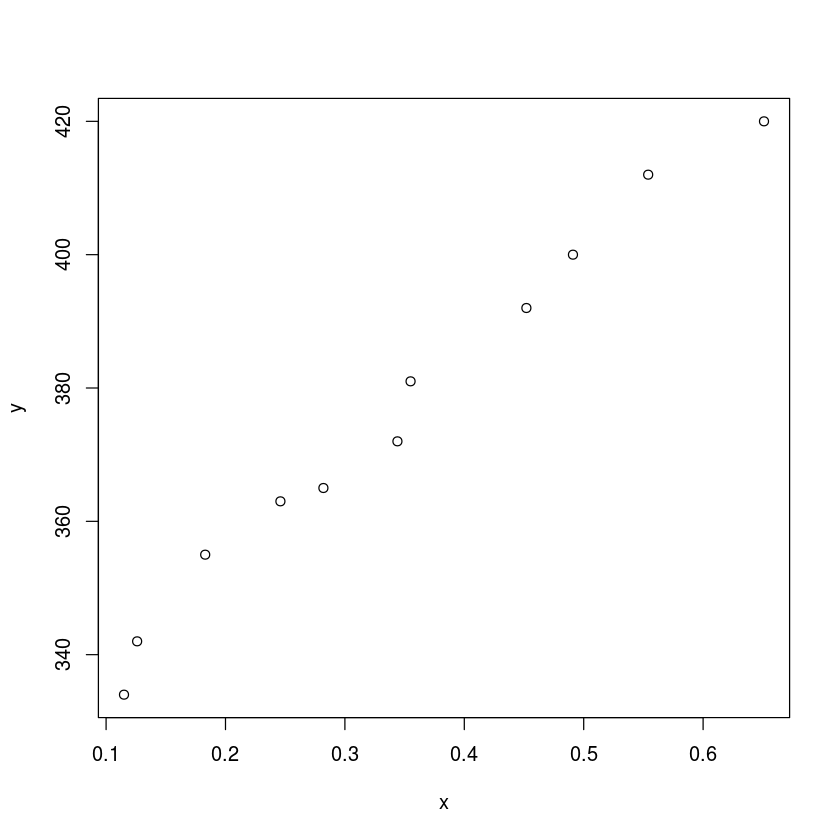

In [43]:
x <- c(0.115,0.126,0.183,0.246,0.282,0.344,0.355,0.452,0.491,0.554,0.651)
y <- c(334,342,355,363,365,372,381,392,400,412,420)
plot(x,y)

Here is regression output from Minitab:

|Predictor|Coef   |SE Coef|T     |P    |
|---------|-------|-------|------|-----|
|Constant |321.878|2.483  |129.64|0.000|
|absorb   |156.711|6.464  |24.24 |0.000|
|S = 3.60498| R-Sq = 98.5%|R-Sq(adj) = 98.3% |

|SOURCE        |DF|SS    |MS    |F     |P    |
|--------------|--|------|------|------|-----|
|Regression    |1 |7639.0|7639.0|587.81|0.000|
|Residual Error|9 |117.0 |13.0  |      |     |
|Total         |10|7756.0|      |      |     |

(a) Does the simple linear regression model appear to be appropriate? Explain.

Yes| a scatter plot of the data shows a strong| linear pattern| and r^2 = 98.5%. 

(b) What wrinkle resistance angle would you predict for a fabric specimen having an absorbance of 0.360? (Round your answer to two decimal places.)

In [44]:
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_0.360 <- B0+B1*0.360
predict_0.360 %>% round(2)

#check answer
fit <- lm(y~x)
fit$coefficients %*% c(1,0.360) %>% round(2)

[1] 378.29

378.29


(c) What would be the estimate of the expected wrinkle resistance angle when absorbance is 0.360? (Round your answer to two decimal places.)

In [45]:
#not sure why this question is identical to the previous one.
predict_0.360 <- B0+B1*0.360
predict_0.360 %>% round(2)

#check
fit$coefficients %*% c(1,0.360) %>% round(2) 

[1] 378.29

378.29


## Problem 11.
The invasive diatom species Didymosphenia geminata has the potential to inflict substantial ecological and economic damage in rivers. An article described an investigation of colonization behavior. One aspect of particular interest was whether y = colony density was related to x = rock surface area. The article contained a scatterplot and summary of a regression analysis. Here is representative data.

In [46]:
x <- c(50,71,55,50,33,58,79,26,69,44,37,70,20,45,49)
y <- c(173,1950,69,43,23,26,56,28,290,59,192,34,64,206,46)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.22 -182.19  -94.50   48.19 1527.49 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -284.881    390.210  -0.730    0.478
x              9.963      7.354   1.355    0.199

Residual standard error: 472.4 on 13 degrees of freedom
Multiple R-squared:  0.1237,	Adjusted R-squared:  0.05631 
F-statistic: 1.835 on 1 and 13 DF,  p-value: 0.1986


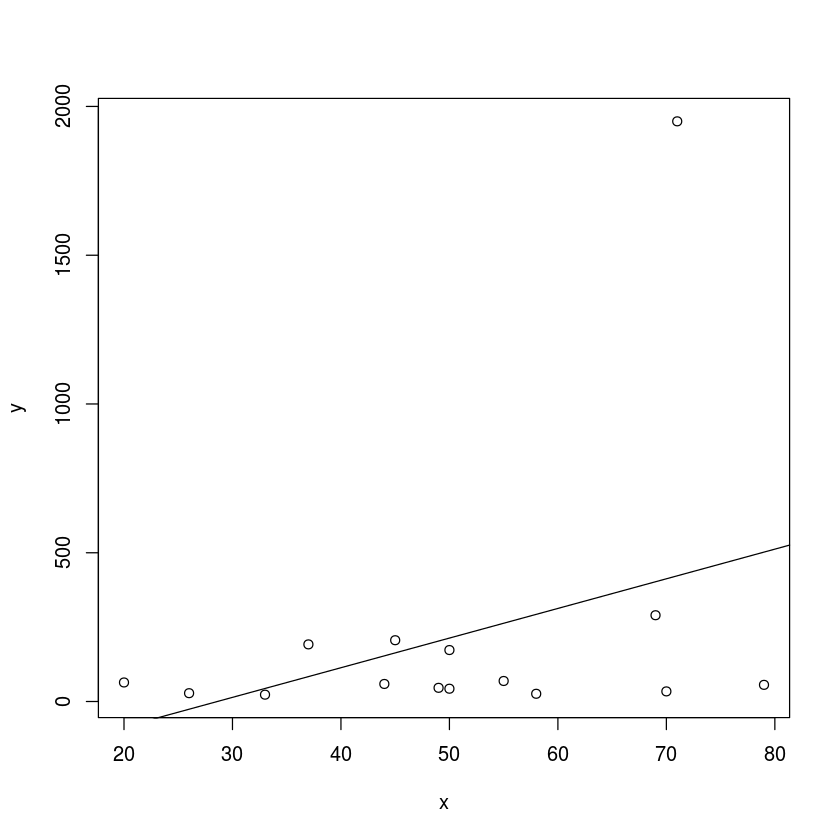

In [47]:
fit <- lm(y~x)
summary_of_fit <- summary(fit)
sigma <- summary_of_fit$sigma #we'll need this for part c
summary_of_fit
plot(x,y)
abline(fit)

(a) Fit the simple linear regression model to this data. (Round your numerical values to three decimal places.)

In [48]:
n <- length(Ratio)
df <- n-2

sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
s <- sqrt(sse/df)
r_squared <- (syy-sse)/syy

paste("y =",B0,"+",B1,"*x")

[1] "y = -284.88132635253 + 9.96325382974597 *x"

Predict colony density when surface area = 70 and calculate the corresponding residual. (Round your answers to the nearest whole number.)
colony density
corresponding residual

In [49]:
y_70 <- (B0+B1*70)
y_70 %>% round(0)
r_70 <- y[x==70]-y_70
r_70 %>% round(0)

[1] 413

[1] -379

Predict colony density when surface area = 71 and calculate the corresponding residual. (Round your answers to the nearest whole number.)
colony density
corresponding residual

In [50]:
y_71 <- (B0+B1*71)
y_71 %>% round(0)
r_71 <- y[x==71]-y_71
r_71 %>% round(0)

[1] 423

[1] 1527

How do the residuals compare?

The residual for the first point is negative, while the residual for the second point is positive.    

(b) Calculate the coefficient of determination. (Round your answer to three decimal places.)

In [51]:
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
r_squared <- (syy-sse)/syy
r_squared %>% round(3)

#check answer
summary_of_fit$r.squared %>% round(3)

[1] 0.124

[1] 0.124

Interpret the coefficient of determination.

The coefficient of determination is the proportion of the total variation in colony density that can be explained by a linear regression model with rock surface area as the predictor. 

(c) The second observation has a very extreme y value (in the full data set consisting of 72 observations, there were two of these). This observation may have had a substantial impact on the fit of the model and subsequent conclusions. Eliminate it and recalculate the equation of the estimated regression line. (Round your values to three decimal places.)

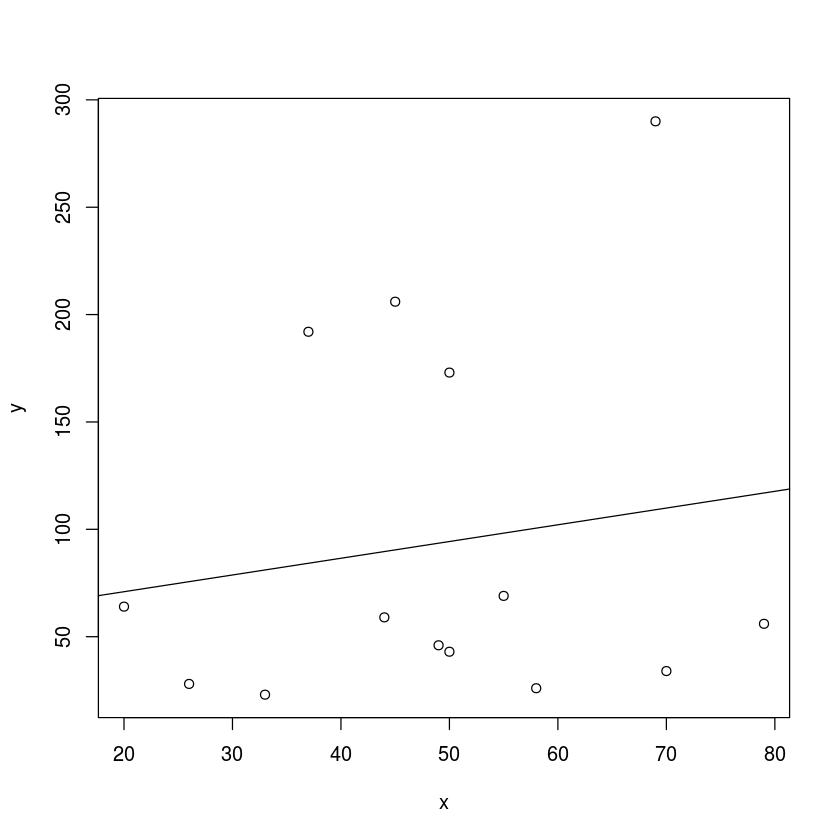

In [52]:
x <- x[-2] #In R, negative index means "don't include this element". In python, negative index means wrap around to the end
y <- y[-2]

n <- length(x)
df <- n-2

sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
s2 <- sqrt(sse/df)
r_squared2 <- (syy-sse)/syy

#check answer
fit <- lm(y~x)
summary_of_fit <- summary(fit)
sigma2 <- summary_of_fit$sigma
plot(x,y)
abline(fit)

In [53]:
paste("y =",B0%>%round(2),"+",B1%>%round(2),"*x")

[1] "y = 55.37 + 0.78 *x"

Does it appear to differ substantially from the equation before the deletion?

The new equation is substantially different. 


What is the impact on r2 and s?

r2 and s are both smaller.

In [54]:
if(r_squared > r_squared2){print("new r^2 is smaller")}
if(s > s2){print("new sigma is smaller")}

[1] "new r^2 is smaller"
[1] "new sigma is smaller"


## Problem 12.
Consider the following data on x = rainfall volume (m3) and y = runoff volume (m3) for a particular location.

In [55]:
x <- c(8,12,14,17,23,30,40,50,55,67,72,81,96,112,127)
y <- c(4,10,13,15,15,25,27,48,38,46,53,73,82,99,103)

Use the accompanying Minitab output to decide whether there is a useful linear relationship between rainfall and runoff.

The regression equation is

runoff = -2.10 + 0.849 rainfall

|Predictor|Coef   |Stdev  |t-ratio|p    |
|---------|-------|-------|-------|-----|
|Constant |-2.102 |2.401  |-0.88  |0.397|
|rainfall |0.84892|0.03694|22.98  |0.000|
|s = 5.260|R-sq = 97.6%|   R-sq(adj) = 97.4%|

State the appropriate null and alternative hypotheses.

H0: β1 = 0 

Ha: β1 ≠ 0    



Compute the test statistic value and find the P-value. (Round your test statistic to two decimal places and your P-value to three decimal places.)

In [56]:
n <- length(y)
df <- n-2

sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx #estimate of the slope
B0    <- mean(y)-B1*mean(x)

predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
s <- sqrt(sse/df) #standard deviation of the residuals
r_squared <- (syy-sse)/syy

s_B1 <- s/sqrt(sxx) #standard deviation of the slope
B1_0 <- 0 #null hypothesis
t <- (B1-B1_0)/s_B1
t %>% round(3)
p_value <- pt(-t,df) + (1-pt(t,df)) #two-tails
p_value %>% round(3)

#check answer
fit <- lm(y~x)
summary_of_fit <- summary(fit)
#summary_of_fit
p_value 
summary_of_fit$coefficients["x","Pr(>|t|)"] #close enough

[1] 22.983

[1] 0

[1] 6.529962e-12

[1] 6.530036e-12

State the conclusion in the problem context. (Use α = 0.05.)

Reject H0. There is a useful linear relationship between runoff and rainfall at the 0.05 level. 


In [57]:
alpha <- 0.05
if (p_value<alpha){
    print("reject H0")
} else {
    print("Fail to reject H0")
}

[1] "reject H0"


Calculate a 95% confidence interval for the true average change in runoff volume associated with a 1 m3 increase in rainfall volume. (Round your answers to three decimal places.)

[1] 0.769 0.929

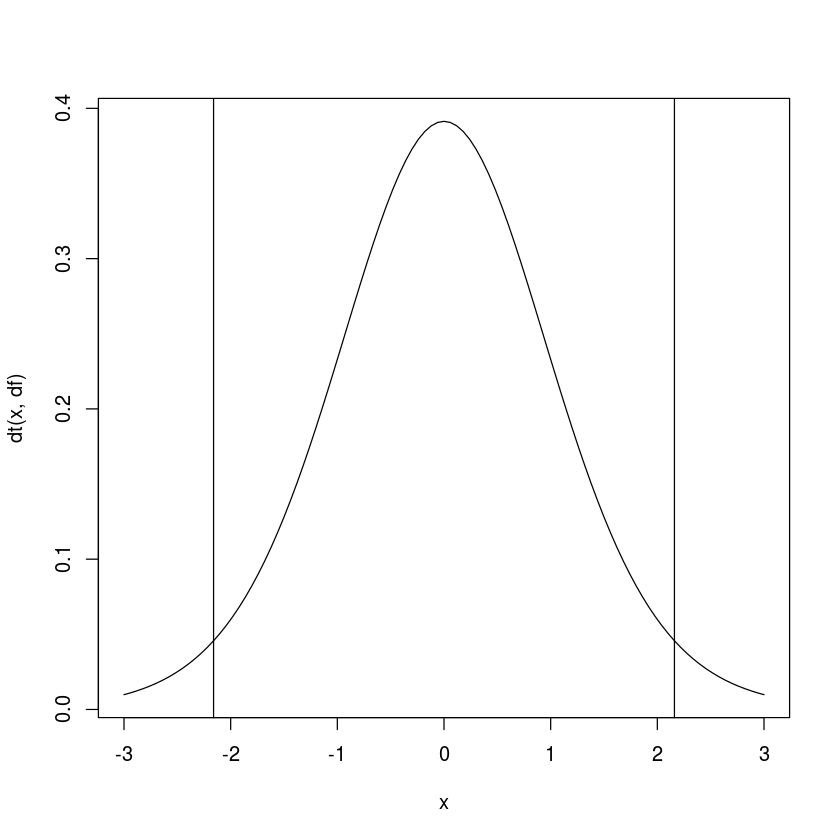

In [58]:
alpha <- 1-0.95
half_alpha <- alpha/2
t_95 <- qt(1-half_alpha,df)
error <- t_95*s_B1
c(B1-error,B1+error) %>% round(3)

#visual
curve(dt(x,df),from = -3, to =3)
abline(v=-t_95)
abline(v=t_95)

## Problem 13.
A statistical program is recommended.
Electromagnetic technologies offer effective nondestructive sensing techniques for determining characteristics of pavement. The propagation of electromagnetic waves through the material depends on its dielectric properties. The following data, kindly provided by the authors of the article "Dielectric Modeling of Asphalt Mixtures and Relationship with Density (" was used to relate y = dielectric constant to x = air void (%) for 18 samples having 5% asphalt content.)

In [59]:
y <- c(4.55,4.49,4.50,4.47,4.47,4.45,4.40,4.34,4.43,4.43,4.42,4.40,4.33,4.44,4.40,4.26,4.32,4.34)
x <- c(4.35,4.79,5.57,5.20,5.07,5.79,5.36,6.40,5.66,5.90,6.49,5.70,6.49,6.37,6.51,7.88,6.74,7.08)

The following R output is from a simple linear regression of y on x.

|   |Estimate|Std. Error|t value|Pr(>|t|)|
|---|--------|----------|-------|---------|
|(Intercept)|4.858691|0.059768|81.283|\<2e-16|
|AirVoid|−0.074676|0.009923|−7.526|1.21e-06|


Residual standard error: 0.03551 on 16 DF Multiple

R-squared: 0.7797||Adjusted R-squared: 0.766
F-statistic: 56.63 on 1 and 16 DF||p-value: 1.214e-06

Analysis of Variance Table 

Response: Dielectric

| |Df|Sum Sq|Mean Sq|F value|Pr(>F)|
|-|--|------|-------|-------|------|
|Airvoid|1|0.071422|0.071422|56.635|1.214e-06|
|Residuals|16|0.20178|0.001261|	

(a) Obtain the equation of the least squares line. (Enter your numerical values to six decimal places.)
Interpret the slope of the equation of the least squares line.
According to the slope, a one-percentage-point increase in air void is associated with an estimated

In [60]:
n <- length(x)
df <- n-2
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)

s <- sqrt(sse/df)
r_squared <- (syy-sse)/syy

paste("y =",round(B0,6),'+',round(B1,6),"* x")

[1] "y = 4.858691 + -0.074676 * x"

(b) What percentage of observed variation in dielectric constant can be attributed to the approximate linear relationship between dielectric constant and air void? (Round your answer to two decimal places.)

In [61]:
(r_squared*100) %>% round(2)

#check answer
fit <- lm(y~x)
summary_of_fit <- summary(fit)
(summary_of_fit$r.squared*100) %>% round(2)

[1] 77.97

[1] 77.97

(c) Does there appear to be a useful linear relationship between dielectric constant and air void? Carry out a test of appropriate hypotheses using a significance level of 0.01.
State the appropriate null and alternative hypotheses.

H0: β1 = 0
Ha: β1 ≠ 0 


Find the test statistic value and find the P-value. (Round your test statistic to two decimal places and your P-value to three decimal places.)

In [62]:
n <- length(y)
df <- n-2
sxx <- sum((x-mean(x))^2) 
sxy <- sum((x-mean(x))*(y-mean(y))) #mixed sum of squares
s <- sqrt(sum(fit$residuals^2)/(n-2)) #standard deviation of the residuals
s_B1 <- s/sqrt(sxx) #standard deviation of the slope
B1_hat <- sxy/sxx

B1_0 <- 0 #null hypothesis
t <- (B1_hat-B1_0)/s_B1
t %>% round(3)
p_value <- pt(-abs(t),df)+(1-pt(abs(t),df)) #two-tails
p_value %>% round(3)

#check answer
fit <- lm(y~x)
summary_of_fit <- summary(fit)
#summary_of_fit
p_value 
summary_of_fit$coefficients["x","Pr(>|t|)"] #close enough

[1] -7.526

[1] 0

[1] 1.214344e-06

[1] 1.214344e-06

In [63]:
alpha <- 0.01
if (p_value<alpha){
    print("reject H0")
} else {
    print("Fail to reject H0")
}

[1] "reject H0"


Reject H0. There is a useful linear relationship between dielectric constant and air void percentage. 

(d) Suppose it had previously been believed that when air void increased by 1 percent, the associated true average change in dielectric constant would be at least −0.063. Does the sample data contradict this belief? Carry out a test of appropriate hypotheses using a significance level of 0.01.

State the appropriate null and alternative hypotheses.

H0: β1 = −0.063
Ha: β1 < −0.063

Webassign wants this, but it is wrong:
H0: β1 = −0.063
Ha: β1 > −0.063 


Compute the test statistic value and find the P-value. (Round your test statistic to two decimal places and your P-value to three decimal places.)

In [64]:
B1_0 <- -0.063
t <- (B1-B1_0)/s_B1
t %>% round(2)
p_value <- pt(-abs(t),df) #left-tail
p_value %>% round(3)

[1] -1.18

[1] 0.128

In [65]:
alpha <- 0.01
if (p_value<alpha){
    print("reject H0")
} else {
    print("Fail to reject H0")
}

[1] "Fail to reject H0"



Fail to reject H0. There is insufficient evidence to contradict the prior belief. 


## Problem 14.
Mist (airborne droplets or aerosols) is generated when metal-removing fluids are used in machining operations to cool and lubricate the tool and workpiece. Mist generation is a concern to OSHA, which has recently lowered substantially the workplace standard. An article gave the accompanying data on x = fluid-flow velocity for a 5% soluble oil (cm/sec) and y = the extent of mist droplets having diameters smaller than 10 µm (mg/m3):

In [66]:
x <- c(89,177,185,354,367,442,963)
y <- c(0.42,0.60,0.51,0.66,0.61,0.69,0.96)

(a) The investigators performed a simple linear regression analysis to relate the two variables. Does a scatter plot of the data support this strategy?

Yes, a scatter plot shows a reasonable linear relationship. 



Call:
lm(formula = y ~ x)

Residuals:
       1        2        3        4        5        6        7 
-0.05804  0.07225 -0.02227  0.03227 -0.02507  0.01257 -0.01172 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.278e-01  3.010e-02   14.21 3.11e-05 ***
x           5.648e-04  6.599e-05    8.56 0.000359 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04701 on 5 degrees of freedom
Multiple R-squared:  0.9361,	Adjusted R-squared:  0.9233 
F-statistic: 73.27 on 1 and 5 DF,  p-value: 0.0003586


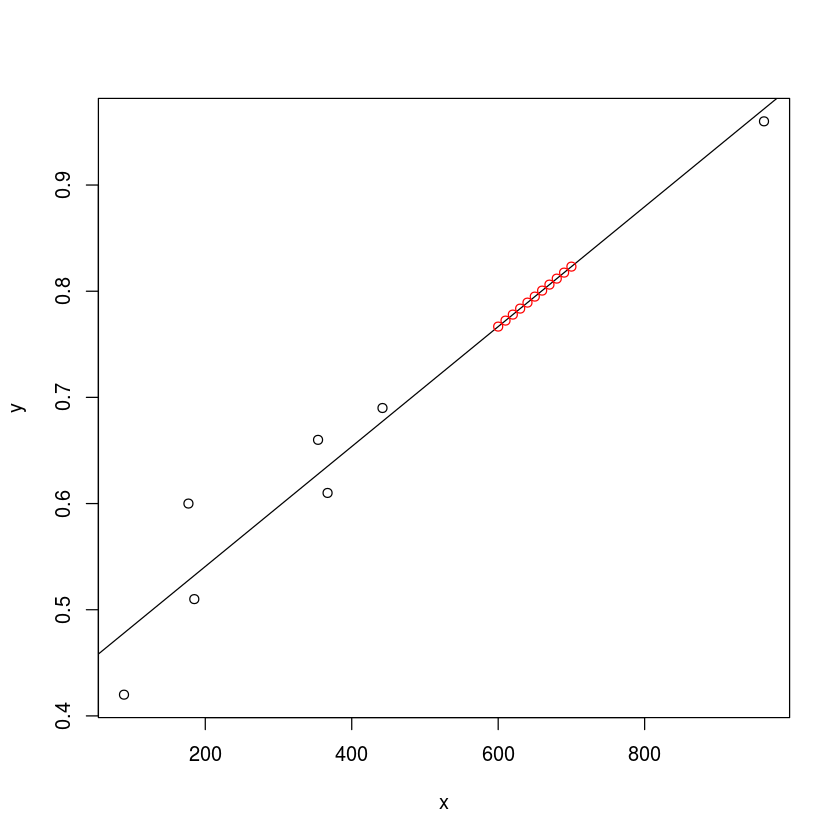

In [113]:
fit <- lm(y~x)
summary_of_fit <- summary(fit)
summary_of_fit

newx <- data.frame(x = seq(600, 700, 10))
newy <- predict(fit, newx) #super useful function
plot(x,y)
abline(fit)
points(data.frame(newx,y=newy),col='red')


(b) What proportion of observed variation in mist can be attributed to the simple linear regression relationship between velocity and mist? (Round your answer to three decimal places.)

In [68]:
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
r_squared <- (syy-sse)/syy
r_squared %>% round(3)

#check answer
summary_of_fit$r.squared %>% round(3)

[1] 0.936

[1] 0.936

(c) The investigators were particularly interested in the impact on mist of increasing velocity from 100 to 1000 (a factor of 10 corresponding to the difference between the smallest and largest x values in the sample). When x increases in this way ( is there substantial evidence that the true average increase in y is less than 0.6? (Use α = 0.05.))

In [69]:
B1_0 <- 0.6/(1000-100) #change in y / change in x
B1_0

[1] 0.0006666667

State the appropriate null and alternative hypotheses.

H0: β1 = 0.0006667

Ha: β1 < 0.0006667     


Calculate the test statistic and determine the P-value. (Round your test statistic to two decimal places and your P-value to three decimal places.)

In [70]:
n <- length(y)
df <- n-2
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
s <- sqrt(sse/df) #standard deviation of the residuals
r_squared <- (syy-sse)/syy
s_B1 <- s/sqrt(sxx) #standard deviation of the slope

t <- (B1-B1_0)/s_B1
t %>% round(2)
p_value <- pt(-abs(t),df)+(1-pt(abs(t),df)) #two-tails
p_value %>% round(3)

[1] -1.54

[1] 0.183

State the conclusion in the problem context.

Fail to reject H0. There is not sufficient evidence that with an increase from 100 to 1000, the true average increase in y is less than 0.6. 

(d) Estimate the true average change in mist associated with a 1 cm/sec increase in velocity ( and do so in a way that conveys information about precision and reliability. (Calculate a 95% CI. Round your answers to six decimal places.)

In [71]:
alpha <- 1-0.95
half_alpha <- alpha/2
t_95 <- qt(1-half_alpha,df)
error <- t_95*s_B1
c(B1-error,B1+error) %>% round(6)

[1] 0.000395 0.000734